In [112]:
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import ast
import os
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
actual_actual_actual_actual_actual_actual_actual_actual_actual_actual_df = pd.read_csv("/home/chiragjishu/chirag/DiT/nanoDiT/dataset/pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [78]:
actual_df = df[['classfication', 'type1', 'type2']]

In [33]:
test_df = df[['type1', 'type2']]
print(type(test_df))
print(type(test_df.iloc[0]))

#two different types of pandas elements
print(test_df.iloc[0][0]) #pandas.core.series.Series object allows for indexing
print(test_df.iloc[0]+test_df.iloc[1]) #does series element allow for concatenation? technically Yes

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
grass
type1      grassgrass
type2    poisonpoison
dtype: object


In [79]:
for i in range(len(actual_df)):
    actual_df.loc[i, 'classfication'] = actual_df.loc[i, 'classfication'].split(" ")[0]
    actual_df.loc[i, 'image_path'] = os.path.join(os.getcwd(), 'dataset/pokemon_jpg/pokemon_jpg', f'{i+1}.jpg')
actual_df.head()

/tmp/ipykernel_1248066/325895726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_df.loc[i, 'classfication'] = actual_df.loc[i, 'classfication'].split(" ")[0]
/tmp/ipykernel_1248066/325895726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_df.loc[i, 'image_path'] = os.path.join(os.getcwd(), 'dataset/pokemon_jpg/pokemon_jpg', f'{i+1}.jpg')


,classfication,type1,type2,image_path
0,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...
1,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...
2,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...
3,Lizard,fire,NaN,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...
4,Flame,fire,NaN,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...


In [43]:
print(len(actual_df['classfication'].unique()))
type(actual_df['classfication'])
#pandas.core.series.Series has an inbulit function .unique()

502


pandas.core.series.Series

In [80]:
# img = Image.open(actual_df['image_path'][0])
for i in actual_df['image_path'].str.split('/'):
    print(i[-1])
    break

1.jpg


In [81]:
actual_df = actual_df[:722]
len(actual_df)
actual_df.loc[0, 'image_path']

'/home/chiragjishu/chirag/DiT/nanoDiT/dataset/pokemon_jpg/pokemon_jpg/1.jpg'

In [82]:
img = Image.open(actual_df.loc[0, 'image_path'])
img.size

(256, 256)

In [83]:
actual_df.to_csv('dataset/actual_df.csv', index=False)

In [ ]:
print((pokemon_types))

['grass grass', 'grass grass', 'grass grass', 'fire fire', 'fire fire', 'fire fire', 'water water', 'water water', 'water water', 'bug bug', 'bug bug', 'bug bug', 'bug bug', 'bug bug', 'bug bug', 'normal normal', 'normal normal', 'normal normal', 'normal normal', 'normal normal', 'normal normal', 'normal normal', 'poison poison', 'poison poison', 'electric electric', 'electric electric', 'ground ground', 'ground ground', 'poison poison', 'poison poison', 'poison poison', 'poison poison', 'poison poison', 'poison poison', 'fairy fairy', 'fairy fairy', 'fire fire', 'fire fire', 'normal normal', 'normal normal', 'poison poison', 'poison poison', 'grass grass', 'grass grass', 'grass grass', 'bug bug', 'bug bug', 'bug bug', 'bug bug', 'ground ground', 'ground ground', 'normal normal', 'normal normal', 'water water', 'water water', 'fighting fighting', 'fighting fighting', 'fire fire', 'fire fire', 'water water', 'water water', 'water water', 'psychic psychic', 'psychic psychic', 'psychic ps

In [95]:
actual_df[['type1', 'type2']].drop_duplicates()

,type1,type2
0,grass,poison
3,fire,NaN
5,fire,flying
6,water,NaN
9,bug,NaN
...,...,...
702,rock,fairy
707,ghost,grass
713,flying,dragon
719,psychic,ghost


In [1]:
import pandas as pd

actual_df = pd.read_csv('dataset/actual_df.csv')
types = list(actual_df['type1'].unique())

'''python
        >>> from transformers import AutoTokenizer, CLIPTextModel

        >>> model = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
        >>> tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

        >>> inputs = tokenizer(["a photo of a cat", "a photo of a dog"], padding=True, return_tensors="pt")

        >>> outputs = model(**inputs)
        >>> last_hidden_state = outputs.last_hidden_state
        >>> pooled_output = outputs.pooler_output  # pooled (EOS token) states
        '''

In [2]:
from transformers import AutoTokenizer, CLIPTextModel

model = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

tensors_of_types = tokenizer(types, padding = True, return_tensors = "pt")
print(tokenizer.pad_token)
print(tensors_of_types)

<|endoftext|>
{'input_ids': tensor([[49406,  5922, 49407],
        [49406,  1769, 49407],
        [49406,  1573, 49407],
        [49406,  8162, 49407],
        [49406,  5967, 49407],
        [49406, 17074, 49407],
        [49406,  5031, 49407],
        [49406,  2461, 49407],
        [49406, 10444, 49407],
        [49406,  4652, 49407],
        [49406, 24916, 49407],
        [49406,  2172, 49407],
        [49406,  7108, 49407],
        [49406,   733, 49407],
        [49406,  5471, 49407],
        [49406,  3144, 49407],
        [49406,  4726, 49407],
        [49406,  4610, 49407]]), 'attention_mask': tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])}


In [109]:
tokenizer.decode([49406, 49407])

'<|startoftext|><|endoftext|>'

In [3]:
outputs = model(**tensors_of_types)
tensors_of_types = outputs.pooler_output

In [4]:
print(tensors_of_types.shape)

torch.Size([18, 512])


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     |████████████████████████████████| 9.2 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 4.7 MB/s eta 0:00:01


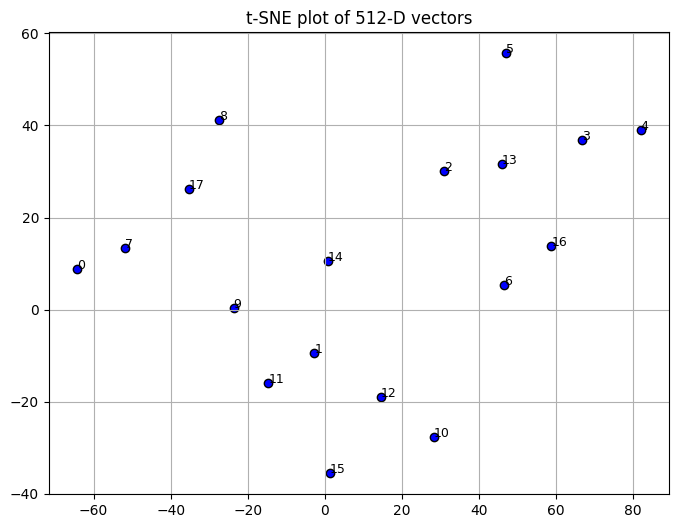

In [116]:
# !pip3 install scikit-learn
!pip3 install matplotlib
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tensor_2d = tsne.fit_transform(tensors_of_types.detach().numpy())

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(tensor_2d[:, 0], tensor_2d[:, 1], c='blue', edgecolors='k')

# Optional: Add labels
for i in range(len(tensor_2d)):
    plt.text(tensor_2d[i, 0], tensor_2d[i, 1], str(i), fontsize=9)

plt.title("t-SNE plot of 512-D vectors")
plt.grid(True)
plt.show()

In [5]:
types_combined = actual_df[['type1', 'type2']].drop_duplicates().reset_index(drop=True)

In [6]:
types_combined.head()
pd.isna(types_combined.loc[1, "type2"])

True

In [7]:
types_combined.head()
len(types_combined)

152

In [8]:
tensors_of_types = tensors_of_types.detach().numpy()
assert len(types) == tensors_of_types.shape[0] 

In [9]:
type_to_tensor = {}
for i in range(len(types)):
    type_to_tensor[types[i]] = tensors_of_types[i]
print(type_to_tensor['grass'].shape)

(512,)


In [10]:

for i in range(len(types_combined)):
    if pd.isna(types_combined.loc[i, "type2"]):
        continue
    type_to_tensor[types_combined.loc[i, "type1"]+"_"+types_combined.loc[i, "type2"]] = type_to_tensor[types_combined.loc[i, "type1"]] + type_to_tensor[types_combined.loc[i, "type2"]]
    print(types_combined.loc[i, "type1"]+"_"+types_combined.loc[i, "type2"])

grass_poison
fire_flying
bug_flying
bug_poison
normal_flying
normal_dark
electric_electric
ground_ice
poison_ground
fire_ice
normal_fairy
poison_flying
bug_grass
ground_ground
water_fighting
water_poison
rock_ground
water_psychic
electric_steel
water_ice
poison_poison
ghost_poison
grass_psychic
ground_fire
ground_rock
psychic_fairy
ice_psychic
water_flying
rock_water
rock_flying
ice_flying
electric_flying
dragon_flying
water_electric
fairy_flying
psychic_flying
water_fairy
grass_flying
water_ground
dark_flying
normal_psychic
bug_steel
ground_flying
steel_ground
bug_rock
bug_fighting
dark_ice
fire_rock
ice_ground
water_rock
steel_flying
dark_fire
water_dragon
rock_dark
psychic_grass
fire_fighting
water_grass
grass_dark
bug_water
grass_fighting
bug_ground
bug_ghost
dark_ghost
steel_fairy
steel_rock
fighting_psychic
water_dark
fire_ground
ground_dragon
rock_psychic
ground_psychic
rock_grass
rock_bug
ice_water
steel_psychic
dragon_psychic
grass_ground
water_steel
normal_water
rock_steel
gh

In [20]:
len(type_to_tensor.items())

152

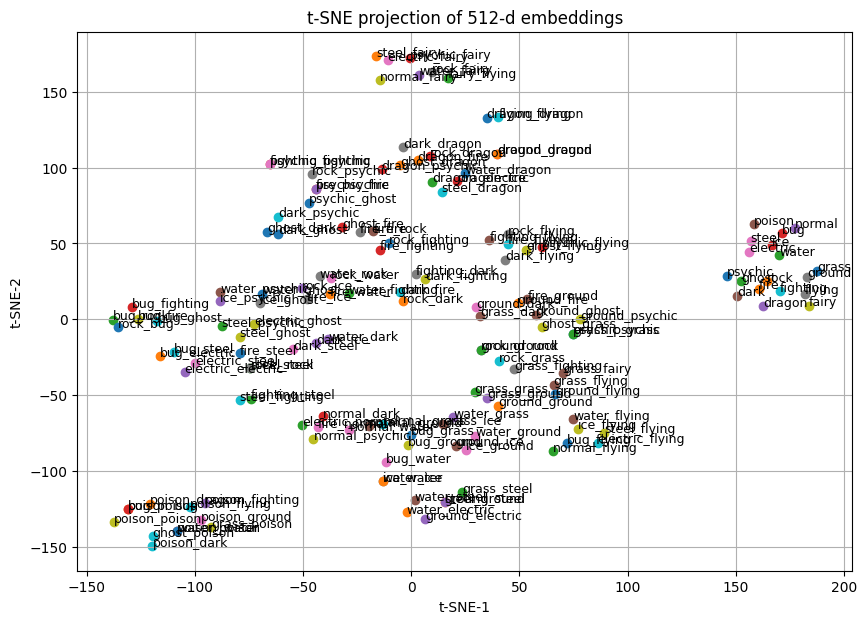

In [ ]:
labels = list(type_to_tensor.keys())
vectors = np.stack(list(type_to_tensor.values()))  # Shape: (n, 512)

# Step 2: Apply t-SNE (reduce to 2D for plotting)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # tune perplexity if needed
tsne_results = tsne.fit_transform(vectors)  # Shape: (n, 2)

# Step 3: Plot
plt.figure(figsize=(10, 7))
for i, label in enumerate(labels):
    x, y = tsne_results[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y), fontsize=9)
plt.title("t-SNE projection of 512-d embeddings")
plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")
plt.grid(True)
plt.show()

In [1]:
from PIL import Image
import torch
torch.backends.cudnn.enabled = False
import torchvision.transforms as transforms
from torchvision.utils import save_image
from diffusers import AutoencoderDC
# from autonotebook import tqdm as notebook_tqdm

device = torch.device("cuda")
dc_ae: AutoencoderDC = AutoencoderDC.from_pretrained(f"mit-han-lab/dc-ae-f64c128-in-1.0-diffusers", torch_dtype=torch.float32).to(device).eval()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

image = Image.open("/home/chiragjishu/chirag/DiT/nanoDiT/dataset/pokemon_jpg/pokemon_jpg/1.jpg")
x = transform(image)[None].to(device)
latent = dc_ae.encode(x).latent
print(latent.shape)

torch.Size([1, 128, 4, 4])


In [13]:
actual_df['combined'] = actual_df['type1']
mask = actual_df['type2'].notna()
actual_df.loc[mask, 'combined'] = actual_df.loc[mask, 'type1'] + "_" + actual_df.loc[mask, 'type2']


In [14]:
actual_df.head()


,classfication,type1,type2,image_path,combined
0,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,grass_poison
1,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,grass_poison
2,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,grass_poison
3,Lizard,fire,NaN,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,fire
4,Flame,fire,NaN,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,fire


In [15]:
mapping = dict(enumerate(actual_df['combined'].astype("category").cat.categories))


In [16]:
actual_df.head()

,classfication,type1,type2,image_path,combined,numeric_label
0,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,grass_poison,70
1,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,grass_poison,70
2,Seed,grass,poison,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,grass_poison,70
3,Lizard,fire,NaN,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,fire,42
4,Flame,fire,NaN,/home/chiragjishu/chirag/DiT/nanoDiT/dataset/p...,fire,42


In [18]:
len(actual_df["numeric_label"].unique())

152

In [20]:
print(type_to_tensor.keys())

dict_keys(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric', 'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice', 'dragon', 'dark', 'steel', 'flying', 'grass_poison', 'fire_flying', 'bug_flying', 'bug_poison', 'normal_flying', 'normal_dark', 'electric_electric', 'ground_ice', 'poison_ground', 'fire_ice', 'normal_fairy', 'poison_flying', 'bug_grass', 'ground_ground', 'water_fighting', 'water_poison', 'rock_ground', 'water_psychic', 'electric_steel', 'water_ice', 'poison_poison', 'ghost_poison', 'grass_psychic', 'ground_fire', 'ground_rock', 'psychic_fairy', 'ice_psychic', 'water_flying', 'rock_water', 'rock_flying', 'ice_flying', 'electric_flying', 'dragon_flying', 'water_electric', 'fairy_flying', 'psychic_flying', 'water_fairy', 'grass_flying', 'water_ground', 'dark_flying', 'normal_psychic', 'bug_steel', 'ground_flying', 'steel_ground', 'bug_rock', 'bug_fighting', 'dark_ice', 'fire_rock', 'ice_ground', 'water_rock', 'steel_flying', 'dark_fire', 'water_drag

In [23]:
mapping

{0: 'bug',
 1: 'bug_electric',
 2: 'bug_fighting',
 3: 'bug_fire',
 4: 'bug_flying',
 5: 'bug_ghost',
 6: 'bug_grass',
 7: 'bug_ground',
 8: 'bug_poison',
 9: 'bug_rock',
 10: 'bug_steel',
 11: 'bug_water',
 12: 'dark',
 13: 'dark_dragon',
 14: 'dark_fighting',
 15: 'dark_fire',
 16: 'dark_flying',
 17: 'dark_ghost',
 18: 'dark_ice',
 19: 'dark_psychic',
 20: 'dark_steel',
 21: 'dragon',
 22: 'dragon_electric',
 23: 'dragon_fire',
 24: 'dragon_flying',
 25: 'dragon_ground',
 26: 'dragon_ice',
 27: 'dragon_psychic',
 28: 'electric',
 29: 'electric_electric',
 30: 'electric_fairy',
 31: 'electric_flying',
 32: 'electric_ghost',
 33: 'electric_normal',
 34: 'electric_steel',
 35: 'fairy',
 36: 'fairy_flying',
 37: 'fighting',
 38: 'fighting_dark',
 39: 'fighting_flying',
 40: 'fighting_psychic',
 41: 'fighting_steel',
 42: 'fire',
 43: 'fire_fighting',
 44: 'fire_fire',
 45: 'fire_flying',
 46: 'fire_ground',
 47: 'fire_ice',
 48: 'fire_normal',
 49: 'fire_psychic',
 50: 'fire_rock',
 51:

In [24]:
lookup_table = []

for i in range(len(mapping)):
    lookup_table.append(type_to_tensor[mapping[i]])

In [25]:
len(lookup_table)

152

In [29]:
import numpy as np
lookup_table = np.array(lookup_table)

In [30]:
actual_df.to_csv('actual_df.csv', index=False)

In [31]:
lookup_table.shape

(152, 512)

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
lookup_table = pca.fit_transform(lookup_table)

In [33]:
!pip3 install scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [35]:
lookup_table.shape

(152, 128)

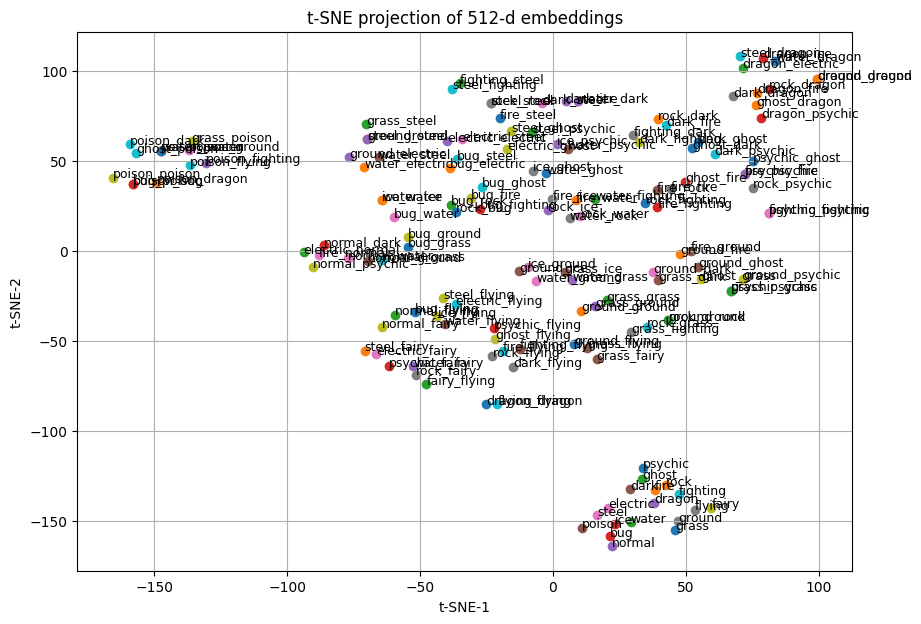

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
labels = list(type_to_tensor.keys())
vectors = np.stack(list(type_to_tensor.values()))  # Shape: (n, 512)

# Step 2: Apply t-SNE (reduce to 2D for plotting)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # tune perplexity if needed
tsne_results = tsne.fit_transform(vectors)  # Shape: (n, 2)

# Step 3: Plot
plt.figure(figsize=(10, 7))
for i, label in enumerate(labels):
    x, y = tsne_results[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y), fontsize=9)
plt.title("t-SNE projection of 512-d embeddings")
plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")
plt.grid(True)
plt.show()

In [37]:
np.save('og_lookup.npy', lookup_table)